# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

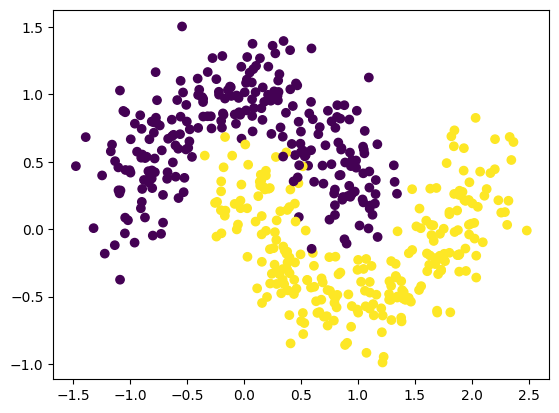

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

LR accuracy: 0.856
SVM accuracy: 0.858


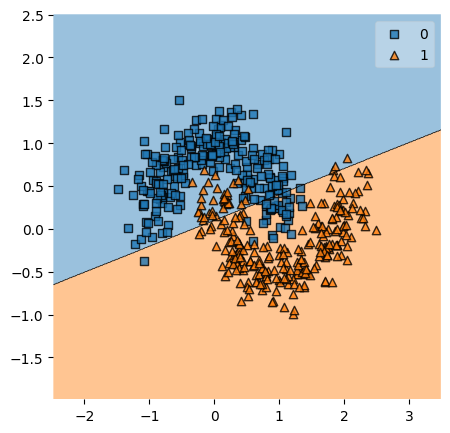

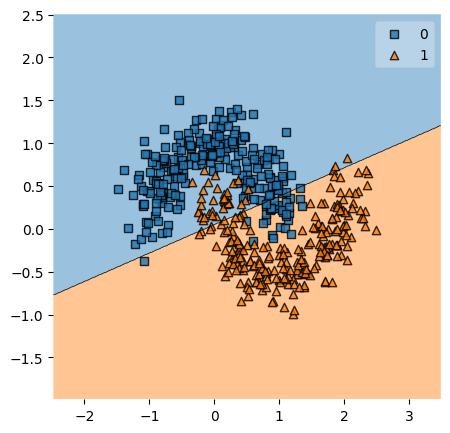

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# пишем функцию, позволяющую строить графики с указанием границ классификатора
def plot_decisions(X, y, estimator):
    plt.figure(figsize=(5, 5))
    plot_decision_regions(X, y, clf=estimator)
    plt.show()

# задаем логистическую регрессию для этой задачи
lr = LogisticRegression(C=1.0)

# задаем SVM с линейным ядром
linear_svc = SVC(kernel="linear", C=1.0)

lr.fit(moons_points, moons_labels)
linear_svc.fit(moons_points, moons_labels)

lr_pred = lr.predict(moons_points)
lr_acc = accuracy_score(moons_labels, lr_pred)
linear_svc_pred = linear_svc.predict(moons_points)
linear_svc_acc = accuracy_score(moons_labels, linear_svc_pred)

print(f"LR accuracy: {lr_acc}")
print(f"SVM accuracy: {linear_svc_acc}")

plot_decisions(moons_points, moons_labels, lr)
plot_decisions(moons_points, moons_labels, linear_svc)

Решения, как и точности получаются очень похожи для этой задачи, но далеко не лучшие

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [4]:
# на 4 классах в последних пунктах , когда plot_decision_regions красит рамки выбираемых по дефолту крестиков в цвет, возникает
# много варнингов, поэтому я поменял маркеры точек на одинаковые кружки
def plot_decisions(X, y, estimator):
    plt.figure(figsize=(5, 5))
    plot_decision_regions(X, y, clf=estimator, markers='o')
    plt.show()

SVC poly accuracy: 0.982


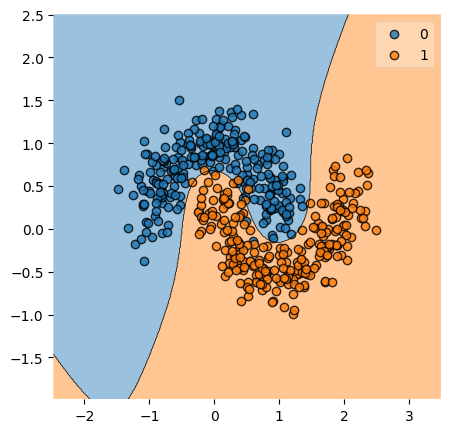

In [5]:
from sklearn.svm import SVC

# используем svm с полиномиальным ядром
poly_svc = SVC(kernel="poly", coef0 = 1.0, degree = 6)
poly_svc.fit(moons_points, moons_labels)

poly_svc_pred = poly_svc.predict(moons_points)
poly_svc_acc = accuracy_score(moons_labels, poly_svc_pred)
print(f"SVC poly accuracy: {poly_svc_acc}")

plot_decisions(moons_points, moons_labels, poly_svc)

SVC sigmoid accuracy: 0.974


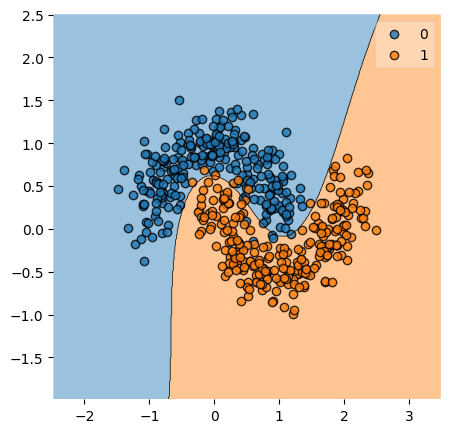

In [6]:
# используем svm с сигмоидным ядром
sigmoid_svc = SVC(kernel="sigmoid", C=1000.0, coef0=-2.0, gamma = 0.3)
sigmoid_svc.fit(moons_points, moons_labels)

sigmoid_svc_pred = sigmoid_svc.predict(moons_points)
sigmoid_svc_acc = accuracy_score(moons_labels, sigmoid_svc_pred)
print(f"SVC sigmoid accuracy: {sigmoid_svc_acc}")

plot_decisions(moons_points, moons_labels, sigmoid_svc)

SVC RBF accuracy: 0.982


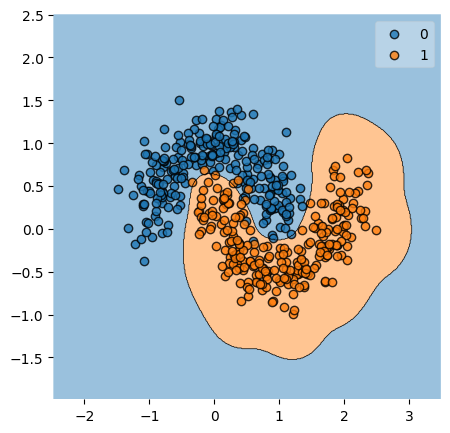

In [7]:
# и с ядром rbf делаем то же
rbf_svc = SVC(kernel="rbf", C = 1.0, gamma=10.0)
rbf_svc.fit(moons_points, moons_labels)

rbf_svc_pred = rbf_svc.predict(moons_points)
rbf_svc_acc = accuracy_score(moons_labels, rbf_svc_pred)
print(f"SVC RBF accuracy: {rbf_svc_acc}")

plot_decisions(moons_points, moons_labels, rbf_svc)

У всех моделей получилась неплохая точность при выборе подходящих параметров, но некоторые классифицируют зоны на плоскости не совсем так, как хотелось бы. Например, svm rbf обвела класс 1 в область, и если будут выбросы, которые все же принадлежат классу, но лежат справа снизу от остальных вне обведенной обласи, модель классифицирует их неправильно.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

diy poly LR accuracy: 0.97
SVM poly accuracy: 0.982


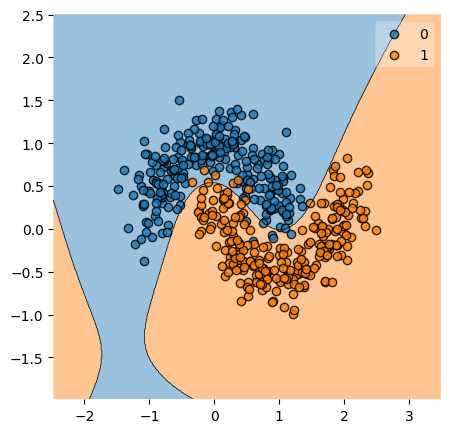

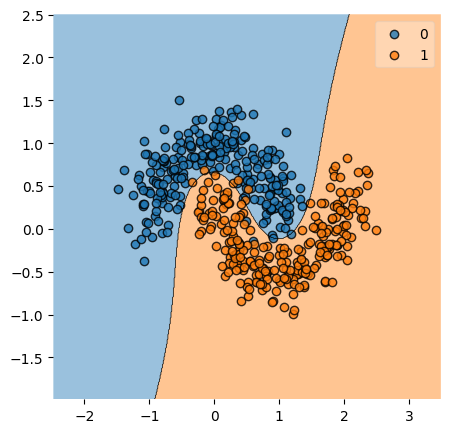

In [9]:
# делаем пайплайн из полиномиального преобразования фичей и логистической регрессии
poly_lr = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = 4)),
    ('logistic', LogisticRegression())
])
poly_lr.fit(moons_points, moons_labels)


poly_svc_to_compare = SVC(kernel="poly", coef0 = 1.6, degree = 4)
poly_svc_to_compare.fit(moons_points, moons_labels)


lr_poly_pred = poly_lr.predict(moons_points)
lr_poly_acc = accuracy_score(moons_labels, lr_poly_pred)

poly_svc_to_compare_pred = poly_svc_to_compare.predict(moons_points)
poly_svc_to_compare_acc = accuracy_score(moons_labels, poly_svc_to_compare_pred)


print(f"diy poly LR accuracy: {lr_poly_acc}")
print(f"SVM poly accuracy: {poly_svc_to_compare_acc}")

plot_decisions(moons_points, moons_labels, poly_lr)
plot_decisions(moons_points, moons_labels, poly_svc_to_compare)

Границы и точность у моделей, в целом похожи.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

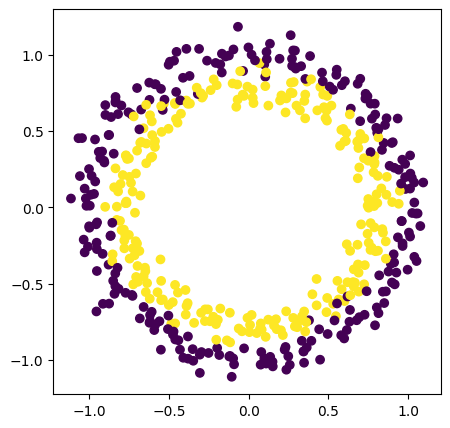

In [10]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

poly SVC accuracy: 0.942


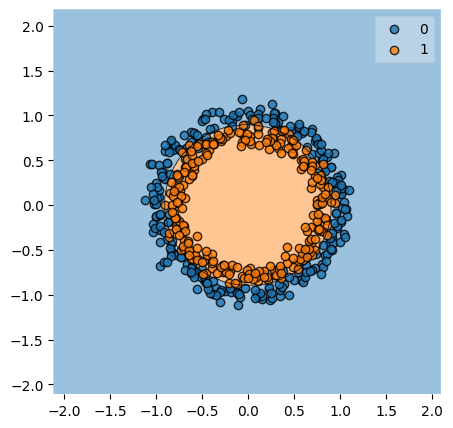

In [11]:
# попробуем полиномиальное ядро
svc_circle = SVC(kernel="poly", degree=2)
svc_circle.fit(circles_points, circles_labels)

svc_circle_pred = svc_circle.predict(circles_points)
svc_circle_acc = accuracy_score(circles_labels, svc_circle_pred)
print(f"poly SVC accuracy: {svc_circle_acc}")

plot_decisions(circles_points, circles_labels, svc_circle)

And even more:

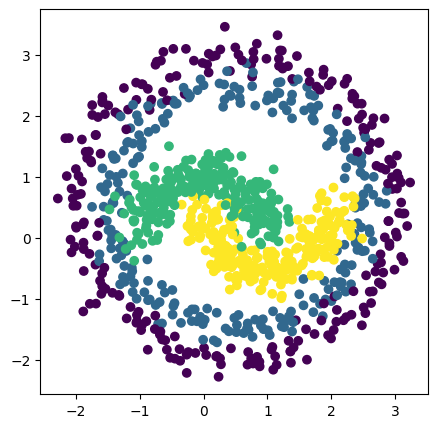

In [12]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

multiclassifier LR poly accuracy: 0.914


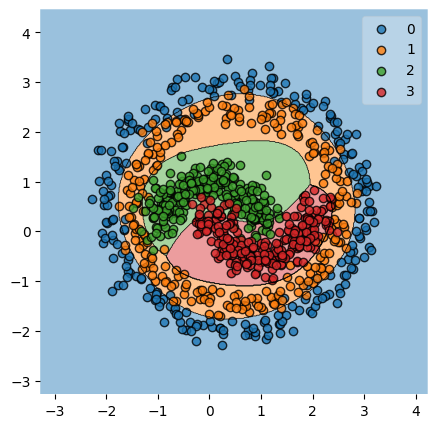

In [13]:
multiclass_lr_poly = poly_lr = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = 4)),
    ('logistic', LogisticRegression(max_iter=1000, tol=1e-3, solver = 'sag'))
])
multiclass_lr_poly.fit(points, labels)

multiclass_lr_poly_pred = multiclass_lr_poly.predict(points)
multiclass_lr_poly_acc = accuracy_score(labels, multiclass_lr_poly_pred)
print(f"multiclassifier LR poly accuracy: {multiclass_lr_poly_acc}")

plot_decisions(points, labels, multiclass_lr_poly)

SVC RBF accuracy: 0.935


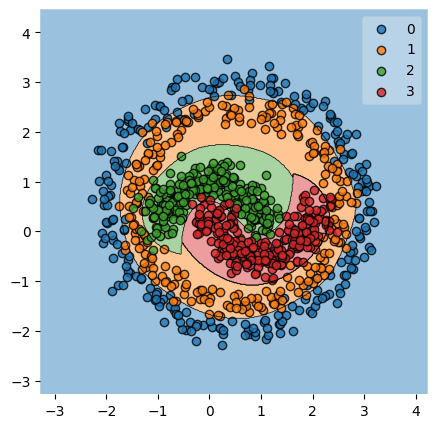

In [14]:
multiclass_rbf_svc = SVC(kernel="rbf", C=1., gamma=1.)
multiclass_rbf_svc.fit(points, labels)

multiclass_rbf_svc_pred = multiclass_rbf_svc.predict(points)
multiclass_rbf_svc_acc = accuracy_score(labels, multiclass_rbf_svc_pred)
print(f"SVC RBF accuracy: {multiclass_rbf_svc_acc}")

plot_decisions(points, labels, multiclass_rbf_svc)

SVC poly accuracy: 0.947


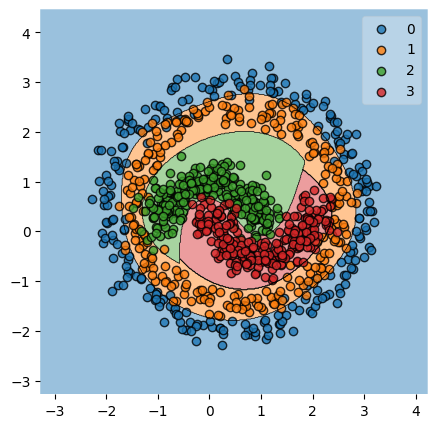

In [15]:
multiclass_poly_svc = SVC(kernel="poly", coef0=3., degree=5)
multiclass_poly_svc.fit(points, labels)

multiclass_poly_svc_pred = multiclass_poly_svc.predict(points)
multiclass_poly_svc_acc = accuracy_score(labels, multiclass_poly_svc_pred)
print(f"SVC poly accuracy: {multiclass_poly_svc_acc}")

plot_decisions(points, labels, multiclass_poly_svc)

RF accuracy: 0.91
hahaha accuracy: 1.0


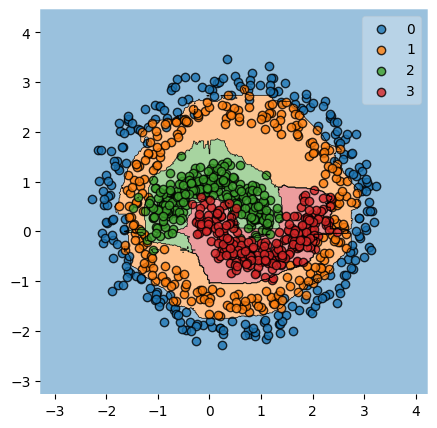

In [20]:
# Попробуем потренировать случайный лес для такой задачи вместе с преобразованием фичей из прошлой части лабы

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

points_train, points_test, labels_train, labels_test = train_test_split(points, labels, test_size=0.20, random_state=24)

rf = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = 5)),
    ('random_forest', RandomForestClassifier(n_estimators=100, max_depth=10))
])
rf.fit(points_train, labels_train)

rf_pred = rf.predict(points_test)
rf_acc = accuracy_score(labels_test, rf_pred)
print(f"RF accuracy: {rf_acc}")

hahaha = rf.predict(points_train)
hahaha_acc = accuracy_score(labels_train, hahaha)
print(f"hahaha accuracy: {hahaha_acc}")

plot_decisions(points, labels, rf)

GB accuracy: 0.915


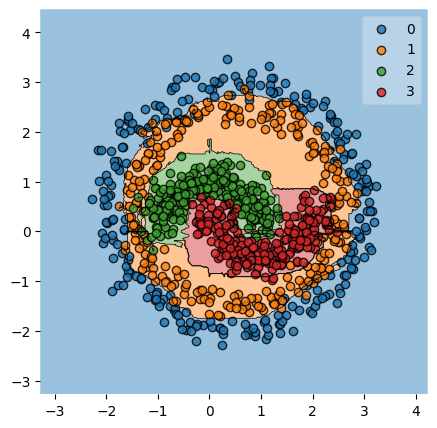

In [21]:
from sklearn.ensemble import GradientBoostingClassifier


# попробуем пайплайн из полиномизирующей трансформации фичей и градиентного бустинга
gb = Pipeline([
    ('preprocessor', PolynomialFeatures(degree = 6)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, n_estimators=130, min_samples_leaf=10, subsample=0.5)),
])
gb.fit(points_train, labels_train)

gb_pred = gb.predict(points_test)
gb_acc = accuracy_score(labels_test, gb_pred)
print(f"GB accuracy: {gb_acc}")

plot_decisions(points, labels, gb)

Получилась нормальная точность, но эти модели явно не лучшие для данной задачи

KNN accuracy: 0.94


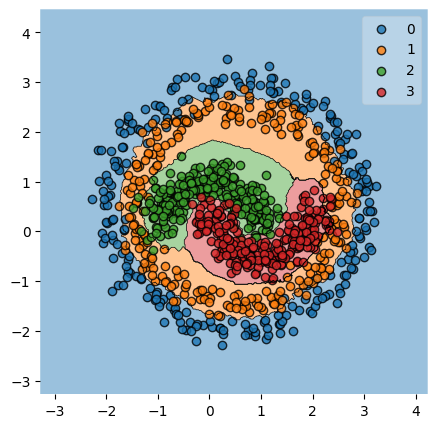

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# попробуем knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(points_train, labels_train)

knn_pred = knn.predict(points_test)
knn_acc = accuracy_score(labels_test, knn_pred)
print(f"KNN accuracy: {knn_acc}")

plot_decisions(points, labels, knn)

Хорошо, но обучение фактически отсутствует, а подсчет идет долго